## Challenge 5 – Advanced Revenue Insights

In [377]:
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [378]:
df = pd.read_csv('../data/cleaned_sales_data.csv')

In [379]:
df

,InvoiceDate,Country,ProductName,Quantity,UnitPrice
0,2022-01-01,United Kingdom,Sports Watch,8,78.76
1,2022-01-01,Spain,Smartphone Case,7,33.81
2,2022-01-01,France,Sunglasses,4,96.58
3,2022-01-02,United Kingdom,Sunglasses,1,33.37
4,2022-01-02,Spain,Red T-shirt,5,19.67
...,...,...,...,...,...
995,2023-12-29,France,Backpack,5,65.89
996,2023-12-29,Netherlands,Smartphone Case,2,16.19
997,2023-12-29,Netherlands,Sports Watch,4,85.62
998,2023-12-30,Germany,Sports Watch,4,35.78


In [380]:
df.isnull().sum()

InvoiceDate    0
Country        0
ProductName    0
Quantity       0
UnitPrice      0
dtype: int64

In [381]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [382]:
df['Revenue'] = df['UnitPrice'] * df['Quantity']

In [383]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   InvoiceDate  1000 non-null   datetime64[ns]
 1   Country      1000 non-null   object        
 2   ProductName  1000 non-null   object        
 3   Quantity     1000 non-null   int64         
 4   UnitPrice    1000 non-null   float64       
 5   Revenue      1000 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(2)
memory usage: 47.0+ KB


In [384]:
grouped_df = df.groupby('ProductName')['Revenue'].sum().reset_index()
sorted_grouped_df = grouped_df.sort_values(by='Revenue', ascending=False)

In [385]:
top_products_df = sorted_grouped_df.head(7)

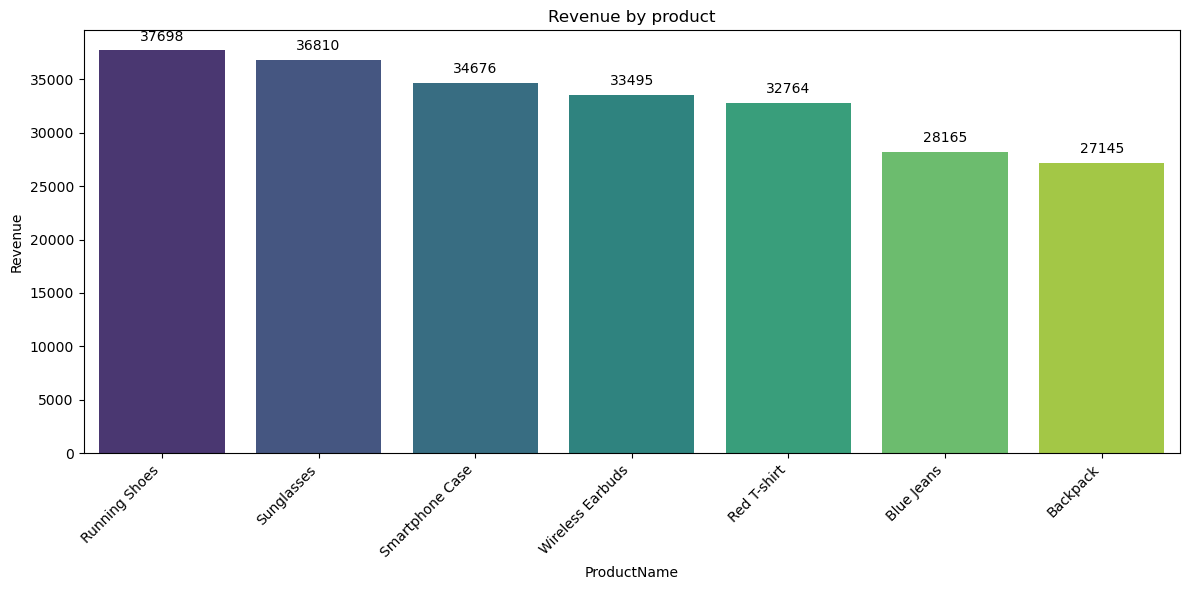

In [386]:
product_order = top_products_df['ProductName'].tolist()
plt.figure(figsize=(12, 6))
plt.xlabel('Product')
plt.ylabel('Revenue')
plt.title('Revenue by product')

ax = sns.barplot(x='ProductName', y='Revenue', data=top_products_df, order=product_order, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.0f}',
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center',
                xytext=(0, 10),          
                textcoords='offset points',
                fontsize=10,
                color='black')

plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Running Shoes, Sunglasses, and Smartphone Cases together account for the largest share of revenue. These categories should be prioritized for promotional efforts, inventory planning, and bundled offers.

In [387]:
country_grouped = df.groupby('Country')['Revenue'].sum().reset_index()

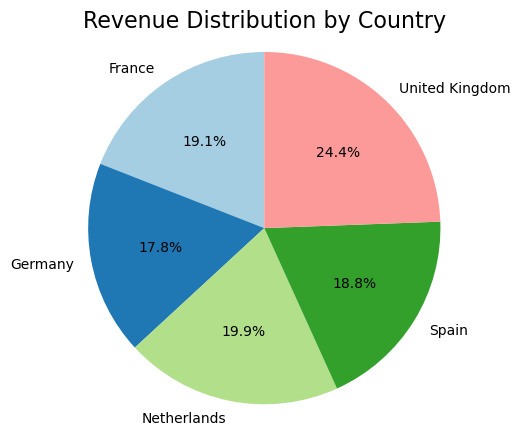

In [388]:
plt.figure(figsize=(5, 5)) 
plt.pie(
    country_grouped['Revenue'],  
    labels=country_grouped['Country'], 
    autopct='%1.1f%%',
    startangle=90,   
    colors=plt.cm.Paired.colors
)
plt.title('Revenue Distribution by Country', fontsize=16)
plt.axis('equal')
plt.show()

With the UK, Netherlands, and France leading in total revenue share, targeted promotions in these markets are likely to drive the greatest returns

In [389]:
country_grouped = df.groupby('InvoiceDate')['Revenue'].sum()
monthly_revenue = country_grouped.resample('M').sum()
monthly_revenue_df = monthly_revenue.reset_index()
monthly_revenue_df.head()

,InvoiceDate,Revenue
0,2022-01-31,13719.32
1,2022-02-28,10189.73
2,2022-03-31,13240.49
3,2022-04-30,14651.92
4,2022-05-31,9850.65


Text(0.5, 1.0, 'Revenue by Product')

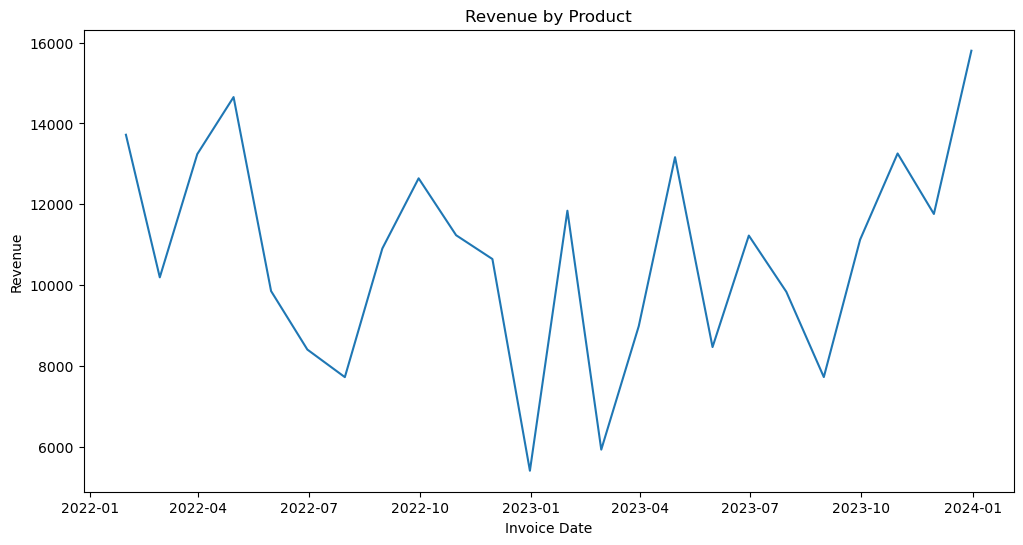

In [390]:
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue_df['InvoiceDate'], y=monthly_revenue_df['Revenue'])
plt.xlabel('Invoice Date')
plt.ylabel('Revenue')
plt.title('Revenue by Product')

Revenue consistently spikes in December and April, suggesting strong sales around public holidays. 
Inventory planning should account for these seasonal peaks.

### Summary of Findings – Challenge 5: Advanced Revenue Insights

1. **Top Products Drive Revenue**
   - *Running Shoes*, *Sunglasses*, and *Smartphone Cases* are the top three revenue-generating products.
   - These categories significantly outperform others and should be prioritized for bundling, discount strategies, or feature placement in stores.

2. **Seasonal Trends Suggest Holiday Influence**
   - Monthly revenue trends reveal noticeable spikes in **December** and **April**, aligning with public holiday periods.
   - Inventory planning and promotional campaigns should align with these peaks to maximize returns.

3. **Country-Level Revenue Distribution**
   - The **United Kingdom**, **Netherlands**, and **France** together contribute over 60% of total revenue.
   - These regions represent the most lucrative markets and should be focal points for regional promotions and investment.